In [ ]:
Running Average of Pattern Waiting Times: Empirical vs. Theoretical

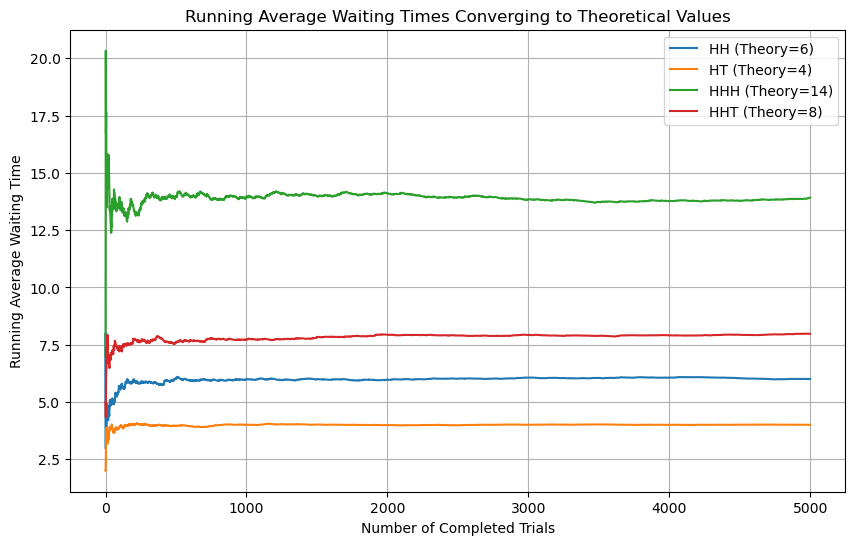

In [3]:
import random
import matplotlib.pyplot as plt

def simulate_running_average(pattern, n_trials=5000, max_length=500):
    """
    Simulates the waiting time for the pattern appearing in random tosses.
    Returns a list of running averages after each completed trial.
    """
    running_averages = []
    total_time = 0
    count = 0
    for _ in range(n_trials):
        seq = ''
        tosses = 0
        while True:
            seq += random.choice(['H', 'T'])
            tosses += 1
            if seq.endswith(pattern):
                total_time += tosses
                count += 1
                running_averages.append(total_time / count)
                break
            if tosses > max_length:
                # Ignore runs that take too long to avoid outliers
                break
    return running_averages

# Define the patterns to simulate
patterns = ['HH', 'HT', 'HHH', 'HHT']

# Theoretical expected waiting times for comparison
theoretical_values = {'HH': 6, 'HT': 4, 'HHH': 14, 'HHT': 8}

# Run simulations for all patterns
running_avg_data = {}
for pat in patterns:
    running_avg_data[pat] = simulate_running_average(pat)

# Plot running averages for each pattern
plt.figure(figsize=(10,6))
for pat in patterns:
    plt.plot(running_avg_data[pat], label=f'{pat} (Theory={theoretical_values[pat]})')

plt.xlabel('Number of Completed Trials')
plt.ylabel('Running Average Waiting Time')
plt.title('Running Average Waiting Times Converging to Theoretical Values')
plt.legend()
plt.grid(True)
plt.show()
